# 6 Networks

Reading the book [Humanities Data and R](http://humanitiesdata.org)

In an Anaconda installation, in order to get igraph, on the command line do

``conda install -c https://conda.anaconda.org/r r-igraph``

and then also

``conda install gmp``

In [1]:
library(igraph)

ERROR: Error in library(igraph): there is no package called ‘igraph’


In [4]:
help(igraph)

igraph-package {igraph},R Documentation


In [6]:
help(graph_from_literal)

graph_from_literal {igraph},R Documentation
...,"For graph_from_literal the formulae giving the structure of the graph, see details below. For from_literal all arguments are passed to graph_from_literal."
simplify,"Logical scalar, whether to call simplify on the created graph. By default the graph is simplified, loop and multiple edges are removed."


In [15]:
g = graph_from_literal(
    ElizabethII-+Charles-+William-+George, 
    Philip-+Charles-+Harry,
    Diana-+William,
    Diana-+Harry,
    Catherine-+George
)
g

IGRAPH DN-- 8 8 -- 
+ attr: name (v/c)
+ edges (vertex names):
[1] ElizabethII->Charles Charles    ->William Charles    ->Harry  
[4] William    ->George  Philip     ->Charles Diana      ->William
[7] Diana      ->Harry   Catherine  ->George 

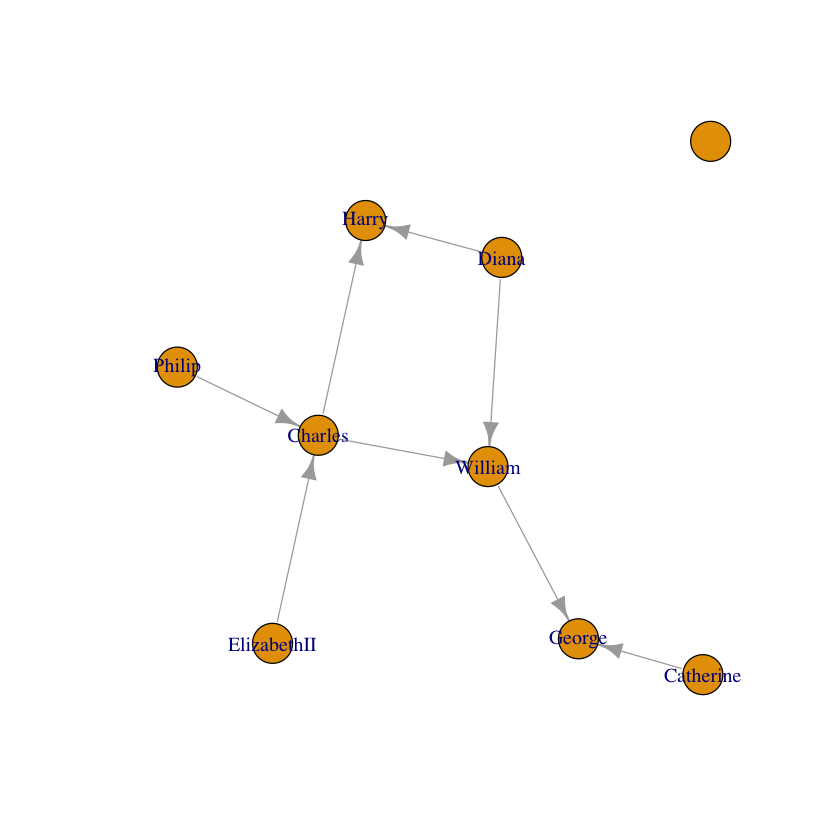

In [9]:
plot.igraph(g)

In [16]:
V(g)

+ 8/8 vertices, named:
[1] ElizabethII Charles     William     George      Philip      Harry      
[7] Diana       Catherine  

In [6]:
g = read_graph('these_crossrefs.ncol', format='ncol')

In [7]:
summary(g)

IGRAPH UNW- 255 224 -- 
+ attr: name (v/c), weight (e/n)


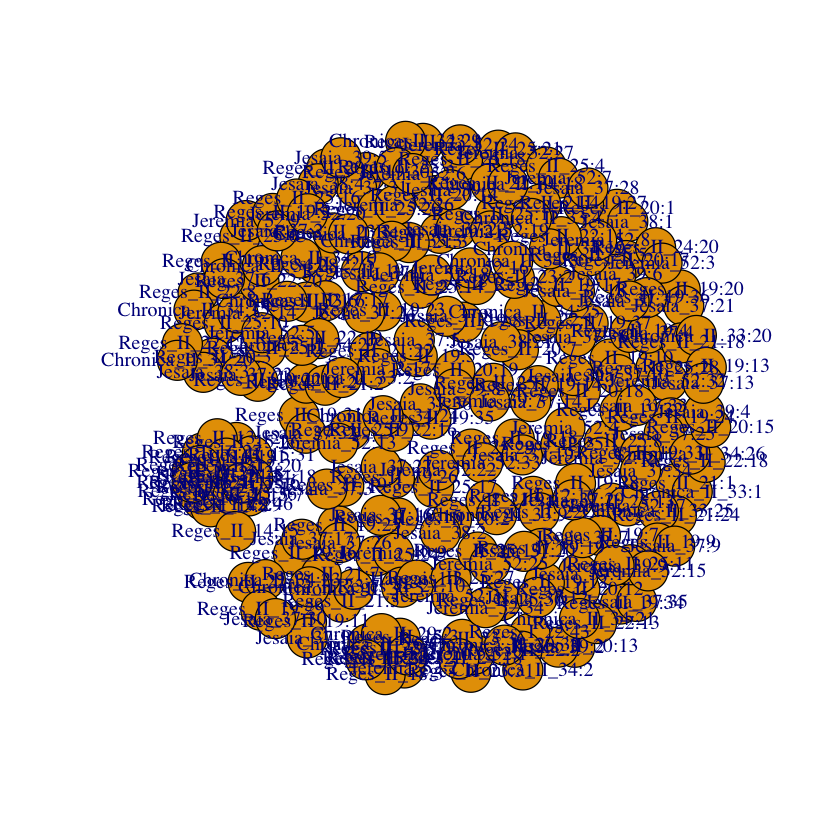

In [8]:
plot.igraph(g)

In [9]:
help(plot.igraph)

plot.igraph {igraph},R Documentation
x,The graph to plot.
axes,"Logical, whether to plot axes, defaults to FALSE."
add,"Logical scalar, whether to add the plot to the current device, or delete the device's current contents first."
xlim,"The limits for the horizontal axis, it is unlikely that you want to modify this."
ylim,"The limits for the vertical axis, it is unlikely that you want to modify this."
mark.groups,"A list of vertex id vectors. It is interpreted as a set of vertex groups. Each vertex group is highlighted, by plotting a colored smoothed polygon around and “under” it. See the arguments below to control the look of the polygons."
mark.shape,"A numeric scalar or vector. Controls the smoothness of the vertex group marking polygons. This is basically the ‘shape’ parameter of the xspline function, its possible values are between -1 and 1. If it is a vector, then a different value is used for the different vertex groups."
mark.col,"A scalar or vector giving the colors of marking the polygons, in any format accepted by xspline; e.g. numeric color ids, symbolic color names, or colors in RGB."
mark.border,"A scalar or vector giving the colors of the borders of the vertex group marking polygons. If it is NA, then no border is drawn."
mark.expand,"A numeric scalar or vector, the size of the border around the marked vertex groups. It is in the same units as the vertex sizes. If a vector is given, then different values are used for the different vertex groups."


In [5]:
help(read_graph)

read_graph {igraph},R Documentation
file,"The connection to read from. This can be a local file, or a http or ftp connection. It can also be a character string with the file name or URI."
format,"Character constant giving the file format. Right now as_edgelist, pajek, graphml, gml, ncol, lgl, dimacs and graphdb are supported, the default is edgelist. As of igraph 0.4 this argument is case insensitive."
...,"Additional arguments, see below."
